In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bouch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bouch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bouch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Bouch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df=pd.read_csv('./data/Dimension-covid.csv')

In [3]:
df.shape

(10666, 21)

In [4]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [5]:
# remove all urls
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

In [6]:
df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [7]:
def preprocessing(text):

    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [8]:
for i in range(df.shape[0]):
    df['Abstract'][i]=preprocessing(str(df['Abstract'][i]))
for text in df.Abstract:
    text=text.replace('\n',' ')

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Bouch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [11]:
df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [12]:
x=[word_tokenize(word) for word in df.Abstract ]

In [13]:
from collections import Counter
cnt = Counter()
for text in df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

  Using cached Pillow-9.0.1-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


You should consider upgrading via the 'C:\Users\Bouch\PycharmProjects\kafka_twitter_streaming\streamVenv\Scripts\python.exe -m pip install --upgrade pip' command.


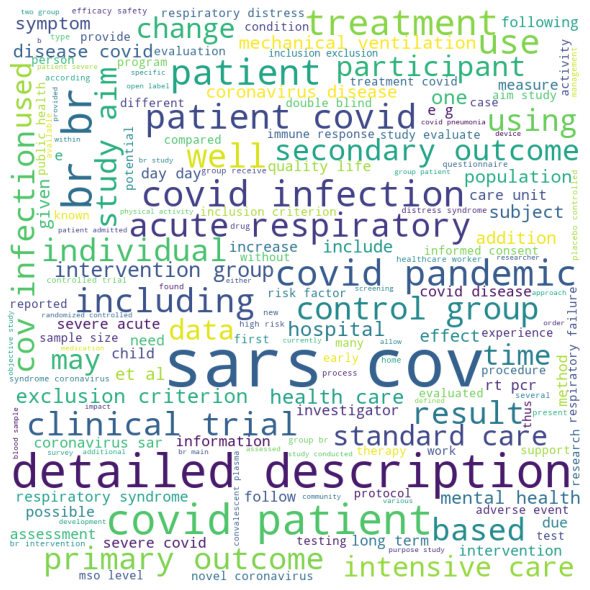

In [14]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS)
from pandas.core.common import flatten


comment_words=flatten(x)
comment_words=' '.join(comment_words)


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [15]:
import gensim
from gensim.models import Word2Vec

skipgram = Word2Vec(x, vector_size =50, window = 3, min_count=2,sg = 1)
#window = 3 -> take 3 words before word and after for context
#min_count = 2 -> word should be present at least twice
print(skipgram)
skipgram.save('skipgramx1.bin')

Word2Vec(vocab=24877, vector_size=50, alpha=0.025)


In [16]:
skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('skipgramx11.bin')

Word2Vec(vocab=24877, vector_size=100, alpha=0.025)


In [17]:
skipgram = Word2Vec.load('skipgramx11.bin')

In [18]:
from gensim.models import FastText
FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)
#min_n = 1 -> min characters
FastText.save('FastText.bin')

In [19]:
FastText = Word2Vec.load('FastText.bin')

In [20]:
#model embeddings- Similarity
skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7523617148399353),
 ('covid', 0.7031269669532776),
 ('evd', 0.6869569420814514),
 ('novelty', 0.6836086511611938),
 ('crown', 0.6767207384109497),
 ('ebola', 0.67182856798172),
 ('declares', 0.6608644723892212),
 ('coronovirus', 0.6603389978408813),
 ('myasthenic', 0.6602581143379211),
 ('virulent', 0.6599869132041931)]

In [21]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('hospitalised', 0.7472313642501831),
 ('subject', 0.7431131601333618),
 ('participant', 0.7323943376541138),
 ('acutely', 0.7322820425033569),
 ('individual', 0.7288989424705505),
 ('moderately', 0.7212023735046387),
 ('recovering', 0.7136467695236206),
 ('survivor', 0.6964616775512695),
 ('pwcf', 0.6941145062446594),
 ('chronically', 0.6899905204772949)]

In [22]:
FastText.wv.most_similar(positive=['lung'],topn=10)

[('lungiq', 0.7673344612121582),
 ('leung', 0.7125569581985474),
 ('sung', 0.6604511141777039),
 ('silicovilung', 0.6577960252761841),
 ('lu', 0.6558182835578918),
 ('volunteering', 0.6511651873588562),
 ('pulmonary', 0.6487944722175598),
 ('lure', 0.6474542617797852),
 ('library', 0.6461895704269409),
 ('blunting', 0.644219160079956)]

In [23]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('breaching', 0.92003333568573),
 ('rebreathing', 0.9172566533088684),
 ('breathe', 0.8977406620979309),
 ('breath', 0.8719789981842041),
 ('breaking', 0.8659347891807556),
 ('breathed', 0.864409327507019),
 ('bathing', 0.8613271117210388),
 ('babybreathe', 0.8549144268035889),
 ('threatening', 0.8423523306846619),
 ('bringing', 0.841134786605835)]

In [24]:
# PCA Plots

In [25]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

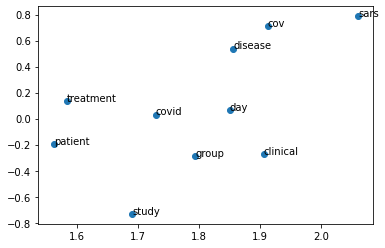

In [26]:
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [27]:
X_fast = FastText.wv[FastText.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)


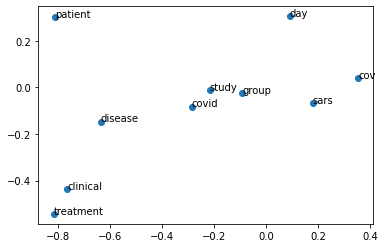

In [28]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show()


In [29]:
# Getting Vectors for each abstract
vector_size=100

In [30]:
#Method 1
import numpy as np
K1=[]

for i in range(df.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract

    for word in word_tokenize(df['Abstract'][i]):   #iterating through all words in given abstract

        if word in list(FastText.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(df.shape[0],vector_size)

In [31]:
#Method 2
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)

In [32]:
K1=[]                                     #defining empty list
for i in df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list

K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('./data/skipgram-vec.csv')

In [33]:
K=pd.read_csv('./data/skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)

In [34]:
#Converting title into vectors using skipgram
K1_title=[]
for i in df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))

K1_title=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title.to_csv('./data/skipgram-vec-title.csv')

In [35]:
K=pd.read_csv('./data/skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    K2_title.append(K[str(i)].values)

In [36]:
### Abstract to vector using FastText
K_fast=[]                                     #defining empty list
for i in df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list

K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('./data/FastText-vec.csv')


In [37]:
data=pd.read_csv('./data/FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(df.shape[0]):
    fast_vectors.append(data[str(i)].values)

In [ ]:
from numpy import dot
from numpy.linalg import norm


In [ ]:
#Cosine similarity
def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [ ]:
#preprocessing input, because input should be in the same form as the training data
def preprocessing_input(query,word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)
    return K